In [213]:
import pandas as pd
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
import itertools
from random import sample 

#Part A 1 Generate polynomial and interaction features for a given degree of the polynomial
def polynomialFeatures(X, degree):   
    pa = []
    for i in range(1,degree+1):
        l = list(itertools.combinations_with_replacement(X, i))
        for j in l:
            pa = pa + [np.prod(np.array(list(j)))]
            
   

    return pa

degree = 3
print("Polynomial Features: ", polynomialFeatures([1, 4, 2, 10],degree))


Polynomial Features:  [1, 4, 2, 10, 1, 4, 2, 10, 16, 8, 40, 4, 20, 100, 1, 4, 2, 10, 16, 8, 40, 4, 20, 100, 64, 32, 160, 16, 80, 400, 8, 40, 200, 1000]


In [4]:
# Part A 2 Mean Squared Error
def mse(Y_true, Y_pred):
    mse = 0
    for i in range(0, len(Y_true)):
        mse = mse + pow((Y_true[i] - Y_pred[i]),2)
    mse = mse/len(Y_true)
    return mse
    
Y_true = [20, 30, 34, 53, 43]
Y_pred = [23, 28, 41, 59, 39]

print("Mean Square Error: ",mse(Y_true, Y_pred))

Mean Square Error:  22.8


In [29]:
# Part A 3 Compute training and validation errors
# seperates array/matrix into k folds
def sHelper(data,k):
    return np.array_split(data, k)


# Object used to hold data for learning curve
class Dummy:
    def __init__(self):
        self.X = np.array([])
        self.Y = np.array([])
        self.w = np.array([])
        self.lambd = 0

    def fit(self, X, Y, lambd):
        self.X = X
        self.Y = Y
        self.lambd = lambd
        
        x_tx = np.matmul(np.transpose(self.X), self.X)
        self.w = np.linalg.inv(x_tx + (self.lambd * np.identity(len(x_tx))))
        xt_y = np.matmul(np.transpose(self.X),self.Y)
        self.w = np.matmul(self.w, xt_y)
    
    def predict(self, X):
        y_hat = np.matmul(X, self.w)
        return y_hat

# Computes Training Scores & Validation Scores
def learning_curve(model, X, Y, cv, train_size=1, learning_rate=0.01, epoches=1000, tol=None, regularization=None, lambd=0.0, **kwargs):

    train_scores = []
    avg_cv = []

    for i in range(1, train_size+1):
        x = X[0:train_size*i][:]
        y = Y[0:train_size*i]

        # create model for data
        model.fit(x,y,lambd)
        train_scores = train_scores + [math.sqrt(mse(y,model.predict(x)))]
        

        cv_x = sHelper(x,cv)
        cv_y = sHelper(y,cv)
        
        avg_cv_tmp = []
        for j in range(0, cv):
            
            x_train = pd.DataFrame([])
            y_train = pd.DataFrame([])
            x_test = pd.DataFrame([])
            y_test = pd.DataFrame([])
            count = 0
            for k in range(0, len(cv_x)):
                if( count == k):
                    x_test = x_test.append(pd.DataFrame(cv_x[k]))
                    y_test = y_test.append(pd.DataFrame(cv_y[k]))
                else:
                    x_train = x_train.append(pd.DataFrame(cv_x[k]))
                    y_train = y_train.append(pd.DataFrame(cv_y[k]))
                    
            count = count + 1
            
            x_train = np.array(x_train).tolist()
            y_train = np.squeeze(np.array(y_train).tolist())
            x_test = np.squeeze(np.array(x_test).tolist())
            y_test = np.array(y_test).tolist()
            if(len(y_test)==1):
                y_test=y_test[0]
            else:
                y_test = np.squeeze(y_test)

                

            model.fit(x_train, y_train, lambd)

            y_hat = model.predict(x_test)
            
            if(type(y_hat)==np.float64):
                tmp = []
                tmp.append(y_hat)
                y_hat = tmp
                

            avg_cv_tmp = avg_cv_tmp + [math.sqrt(mse(y_test,y_hat))]
        
        avg_cv = avg_cv + [np.mean(avg_cv_tmp)]


    return train_scores, avg_cv


   
# training data
X = np.array([[2,3,5,2,4],[2,4,5,2,5],[3,2,3,5,8],[3,2,4,5,2],[2,5,5,1,8],[2,3,2,3,5],[3,4,2,5,6],[2,3,4,5,6],[2,3,4,4,5],[3,5,4,8,9],[9,9,8,4,5],[8,4,2,8,7],
              [3,9,5,4,5],[3,2,4,6,5],[2,3,4,2,5],[9,3,4,3,4],[9,3,2,3,4],[2,3,4,2,4],[2,3,5,2,5],[2,4,5,3,9],[2,3,4,2,5],[2,5,4,5,9],[2,3,9,8,4],[3,5,6,8,4],
              [2,5,8,9,5]])
# training labels
Y = np.array([3,6,3,5,7,4,5,3,4,5,2,3,8,4,5,3,4,5,3,4,3,5,6,5,6]) 

model = Dummy()

train_scores, val_scores = learning_curve(model, X, Y, 5, train_size = 5)

print("Training Scores: ", train_scores)
print("Validation Scores: ", val_scores)

Training Scores:  [2.578203117291091e-13, 0.6566468105638373, 1.3900533388507215, 1.6061332211223076, 1.4577669900813204]
Validation Scores:  [4.75, 1.795530808279657, 1.1729382544957259, 2.5515049240741754, 1.869228687207577]


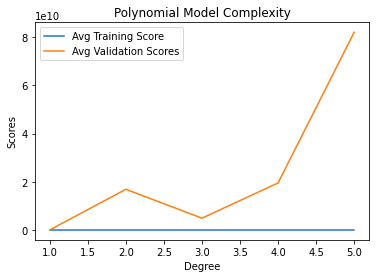

In [506]:
# Part A 4 Compute training and validation errors for various polynomial degrees



def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, learning_rate=0.01, epoches=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    train_scores = []
    val_scores = []
    x_axis = []

    for i in range(1, maxPolynomialDegree+1):
        poly_x = []
        poly_y = []
        for j in range(0, len(X)):
            poly_x = poly_x + [polynomialFeatures(X[j],i)]
        poly_y = polynomialFeatures(Y,i)
        tmp_train_scores, tmp_val_scores = learning_curve(model, np.array(poly_x), np.array(poly_y), cv, train_size = 5)
        train_score = np.mean(tmp_train_scores)
        val_score = np.mean(tmp_val_scores)
        train_scores = train_scores + [train_score]
        val_scores = val_scores + [val_score]
        x_axis.append(i)

    #plot data
    plt.xlabel('Degree')
    plt.ylabel('Scores')
    plt.plot(x_axis, train_scores, label="Avg Training Score")
    plt.plot(x_axis, val_scores, label="Avg Validation Scores")
    plt.title("Polynomial Model Complexity")
    plt.legend()
    plt.show()
    
    

model = Dummy()
    
plot_polynomial_model_complexity(model, X, Y, 5, 5)

In [246]:
# part A 5 Linear Regression Model 

#getting rest of value to calculate regularizer l1 and l2  
def gradiant(self):
    reg = []
    reg_mult = (self.learning_rate * self.lambd)/len(self.X)
    
    if(self.regularizer == "l2"):
        reg = reg_mult * np.array(self.theta)
    elif(self.regularizer == "l1"):
        reg = reg_mult * np.array(np.sign(self.theta))
    elif(self.regularizer == None):
        reg = np.zeros(len(self.X[0]))
        
    self.reg = reg
        
    theta_mult = self.learning_rate/len(self.X)
    y_hat = np.matmul(self.X,self.theta)
    error = np.subtract(self.Y, y_hat) 
    theta_hat = theta_mult * np.array((np.matmul(np.transpose(self.X), error)))
    
    grad = np.subtract(theta_hat, reg)

    
    return grad
    
    
class Linear_Regression:
    def __init__(self):
        self.X = [np.array([])]
        self.Y = np.array([])
        self.learning_rate = 0.0
        self.epochs = 0
        self.tol = None
        self.regularizer = None
        self.lambd = None
        self.theta = []
        self.error = 0
        
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None,lambd=0.0, **kwargs):
        self.X = np.c_[np.ones(len(X)), X]     
        self.Y = Y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.regularizer = regularizer
        self.lambd = lambd
        self.theta = np.zeros(len(self.X[0]))
        self.theta[0]=1
     
        # gradient descent
        for i in range(0, self.epochs):
            reg = []
            reg_mult = (self.learning_rate * self.lambd)/len(self.X)
    
            if(self.regularizer == "l2"):
                reg = reg_mult * np.array(self.theta)
            elif(self.regularizer == "l1"):
                reg = reg_mult * np.array(np.sign(self.theta))
            elif(self.regularizer == None):
                reg = np.zeros(len(self.X[0]))
        
            theta_mult = self.learning_rate/len(self.X)
            y_hat = np.matmul(self.X,self.theta)
            error = np.subtract(y_hat, self.Y)
            theta_hat = theta_mult * np.array((np.matmul(np.transpose(self.X), error)))
            grad = np.subtract(theta_hat, reg)
            
            # check for tol
            if(self.tol != None):
                X_bias = np.c_[np.ones(len(X)), X]
                
                pred_error = mse(np.matmul(X_bias, np.subtract(self.theta,grad)), self.Y)
                
                if(abs(pred_error - self.error) < self.tol):
                    print("Error below tolerance")
                    break
            
            self.error = pred_error
            self.theta = np.subtract(self.theta,grad)
    
    def predict(self, X):
        x = np.c_[np.ones(len(X)), X]
        y_hat = np.matmul(x, self.theta)
        return y_hat
    
    def plot_curve(self):
        plt.xlabel('Features')
        plt.ylabel('Values')
        plt.plot(range(1, len(self.X[0])), self.theta[1::], label="feature values")
        plt.title("Learning Curve")
        plt.legend()
        plt.show()
        
    

X = np.array([[2,3,5,2,4],[2,4,5,2,5],[3,2,3,5,8],[3,2,4,5,2],[2,5,5,1,8],[2,3,2,3,5],[3,4,2,5,6],[2,3,4,5,6],[2,3,4,4,5],[3,5,4,8,9],[9,9,8,4,5],[8,4,2,8,7],
              [3,9,5,4,5],[3,2,4,6,5],[2,3,4,2,5],[9,3,4,3,4],[9,3,2,3,4],[2,3,4,2,4],[2,3,5,2,5],[2,4,5,3,9],[2,3,4,2,5],[2,5,4,5,9],[2,3,9,8,4],[3,5,6,8,4],
              [2,5,8,9,5]])
Y = np.array([3,6,3,5,7,4,5,3,4,5,2,3,8,4,5,3,4,5,3,4,3,5,6,5,6])

lambd = 0.1
learning_rate = 0.001
regularizer = "l1"


model = Linear_Regression()
model.fit(X,Y,learning_rate=learning_rate,regularizer=regularizer,lambd=lambd, tol=.00001)

model.predict( X[0:5][:] )
                
print("Linear Regression Error: ",mse(   model.predict(X[0:5][:])  , Y[0:5]) )    

Linear Regression Error:  2.322102736863127


In [8]:
# part B 6 read in winequality-white.csv file 
data = pd.read_csv('winequality-white.csv',sep=";")

In [18]:
# part B 7 summarize data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [19]:
# part B 8 shuffle rows of data
data=data.sample(frac=1)

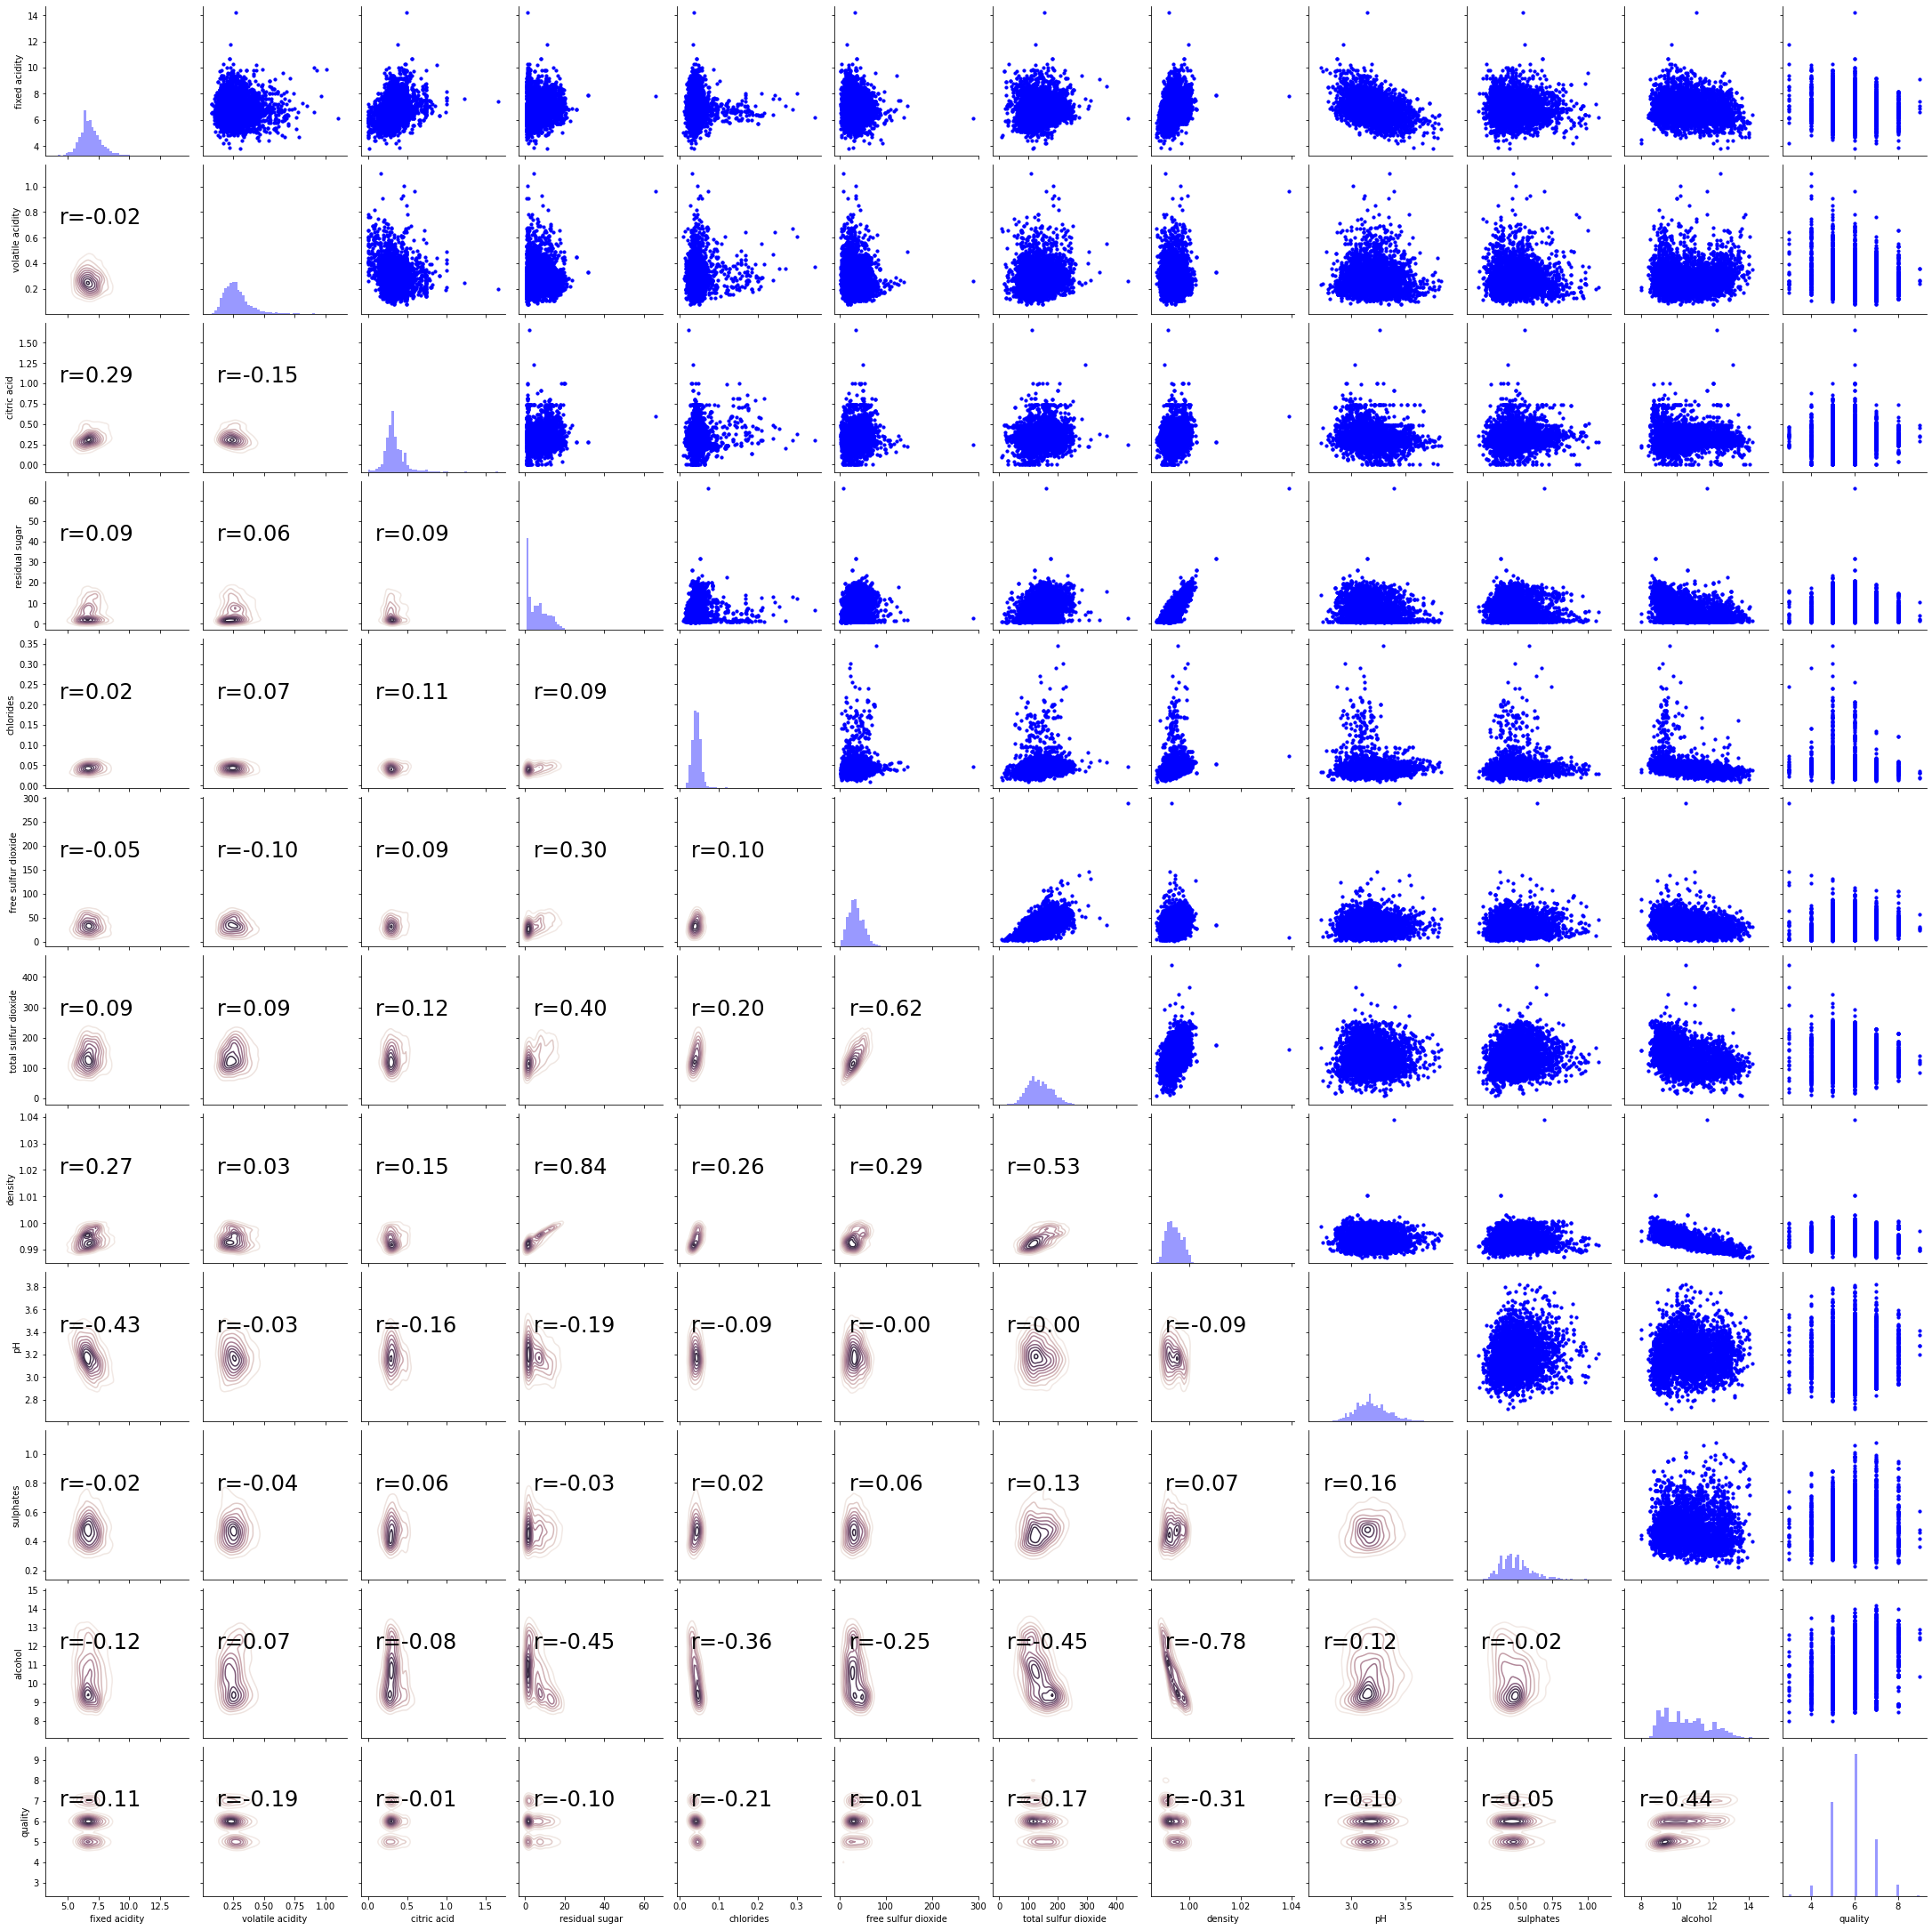

In [20]:
# part B 9 generate pair plots
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

def corrfunc(x,y, **kws):
   r,_= stats.pearsonr(x,y)
   ax = plt.gca()
   ax.annotate("r={:.2f}".format(r), xy =(.1,.6), xycoords = ax.transAxes, size = 24)
cmap = sns.cubehelix_palette(light = 1, dark = 0.1, hue = 0.5, as_cmap = True)
sns.set_context(font_scale=2)
#Pair grid set up
g = sns.PairGrid(data)
#Scatter plot on the upper triangle
g.map_upper(plt.scatter, s = 10, color = 'blue')
#Distribution on the diagonal
g.map_diag(sns.distplot, kde = False, color = 'blue')
#Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [247]:
# part C 10 model selection via hyperparamete tuning
def kFold(model, X, Y, k,lambd, learning_rate, regularizer):
    lams = []
    l_rates = []
    regs = []
    avg_ers = []
    
    for lm in lambd:
        for lr in learning_rate:
            for rg in regularizer:
                avg_e = []
                
                x = X.tolist()
                y = Y.tolist()
                
                cv_x = sHelper(x,k)
                cv_y = sHelper(y,k)
                
                for i in range(0,k):
                    x_train = pd.DataFrame([])
                    y_train = pd.DataFrame([])
                    x_test = pd.DataFrame([])
                    y_test = pd.DataFrame([])
                    
                    
                    count = 0
                    for n in range(0, len(cv_x)):
                        if( count == n):
                            x_test = x_test.append(pd.DataFrame(cv_x[n]))
                            y_test = y_test.append(pd.DataFrame(cv_y[n]))
                        else:
                            x_train = x_train.append(pd.DataFrame(cv_x[n]))
                            y_train = y_train.append(pd.DataFrame(cv_y[n]))
                    
                    count = count + 1
                    
                    
                    x_train = np.array(x_train).tolist()
                    y_train = np.squeeze(np.array(y_train).tolist())
                    x_test = np.squeeze(np.array(x_test).tolist())
                    y_test = np.array(y_test).tolist()
                    
                    if(len(y_test)==1):
                        y_test=y_test[0]
                    else:
                        y_test = np.squeeze(y_test)
                        
                    model.fit(x_train, y_train, learning_rate=lr,lambd=lm, regularizer=rg, tol=.000001)
                    y_hat = model.predict(x_test)
            
                    if(type(y_hat)==np.float64):
                        tmp = []
                        tmp.append(y_hat)
                        y_hat = tmp
                    avg_e = avg_e + [mse(y_test,y_hat)]
                print("AVG error: ", np.mean(avg_e))
                lams = lams + [lm]
                l_rates = l_rates + [lr]
                regs = regs + [rg]
                avg_ers = avg_ers + [np.mean(avg_e)]
    
    return {"lambda" : lams,
            "learning rate" : l_rates,
            "regularizer" : regs,
            "average error" : avg_ers
           }
    
    
lambd = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.0001]
regularizer = ["l1", "l2"]

model = Linear_Regression()

X = data.drop(columns='quality')
X = (X - X.mean())/X.std() ## standardized data
Y = data['quality']

dict = kFold(model, np.array(X), np.array(Y), 5, lambd, learning_rate, regularizer)
print("Finished creating dictionary for linear regression model")

AVG error:  0.6972427978697067
AVG error:  0.6970832972784841
AVG error:  0.7046544858650939
AVG error:  0.7042728589055146
AVG error:  4.44497511174296
AVG error:  4.443294705531563
AVG error:  20.503143627937657
AVG error:  20.502910074597263
AVG error:  0.6975903675119267
AVG error:  0.6975903675119267
AVG error:  0.7047543000186489
AVG error:  0.7047543000186489
AVG error:  4.445159502129995
AVG error:  4.445159502129995
AVG error:  20.503174645518072
AVG error:  20.503174645518072
AVG error:  0.6975553765533292
AVG error:  0.6975394584729482
AVG error:  0.7047442137737102
AVG error:  0.7047059653319536
AVG error:  4.445141002883674
AVG error:  4.444973016421313
AVG error:  20.503171542754927
AVG error:  20.503148188627083
AVG error:  0.6975868660594574
AVG error:  0.6975852745913101
AVG error:  0.7047532906531591
AVG error:  0.7047494646452424
AVG error:  4.445157652097605
AVG error:  4.445140853498643
AVG error:  20.503174335231652
AVG error:  20.50317199983096
AVG error:  0.6975

In [248]:
# part C 11 evaluation for model
dict_df = pd.DataFrame(dict)
print(dict_df)

    lambda  learning rate regularizer  average error
0   1.0000         0.1000          l1       0.697243
1   1.0000         0.1000          l2       0.697083
2   1.0000         0.0100          l1       0.704654
3   1.0000         0.0100          l2       0.704273
4   1.0000         0.0010          l1       4.444975
5   1.0000         0.0010          l2       4.443295
6   1.0000         0.0001          l1      20.503144
7   1.0000         0.0001          l2      20.502910
8   0.0000         0.1000          l1       0.697590
9   0.0000         0.1000          l2       0.697590
10  0.0000         0.0100          l1       0.704754
11  0.0000         0.0100          l2       0.704754
12  0.0000         0.0010          l1       4.445160
13  0.0000         0.0010          l2       4.445160
14  0.0000         0.0001          l1      20.503175
15  0.0000         0.0001          l2      20.503175
16  0.1000         0.1000          l1       0.697555
17  0.1000         0.1000          l2       0.

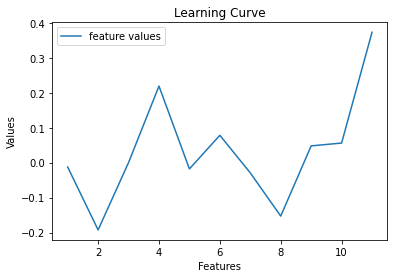

In [249]:
# part C 12 use best model to plot the learning curve
X = data.drop(columns='quality')
X = (X - X.mean())/X.std() ## standardized data
Y = data['quality']
model = Linear_Regression()
model.fit(X, Y, learning_rate=.01,lambd=1, regularizer='l2')
model.plot_curve()

Finished computing poly 3 for data
Starting K Fold evaluation


<ipython-input-183-b235fb4fe65c>:65: RuntimeWarning: overflow encountered in matmul
  theta_hat = theta_mult * np.array((np.matmul(np.transpose(self.X), error)))
<ipython-input-183-b235fb4fe65c>:63: RuntimeWarning: invalid value encountered in matmul
  y_hat = np.matmul(self.X,self.theta)
<ipython-input-183-b235fb4fe65c>:56: RuntimeWarning: invalid value encountered in multiply
  reg = reg_mult * np.array(self.theta)


    lambda  learning rate regularizer  average error
0   1.0000         0.1000          l1            NaN
1   1.0000         0.1000          l2            NaN
2   1.0000         0.0100          l1       0.650979
3   1.0000         0.0100          l2       0.650444
4   1.0000         0.0010          l1       4.965780
5   1.0000         0.0010          l2       4.960907
6   1.0000         0.0001          l1      22.066614
7   1.0000         0.0001          l2      22.064489
8   0.0000         0.1000          l1            NaN
9   0.0000         0.1000          l2            NaN
10  0.0000         0.0100          l1       0.651029
11  0.0000         0.0100          l2       0.651029
12  0.0000         0.0010          l1       4.962958
13  0.0000         0.0010          l2       4.962958
14  0.0000         0.0001          l1      22.064753
15  0.0000         0.0001          l2      22.064753
16  0.1000         0.1000          l1            NaN
17  0.1000         0.1000          l2         

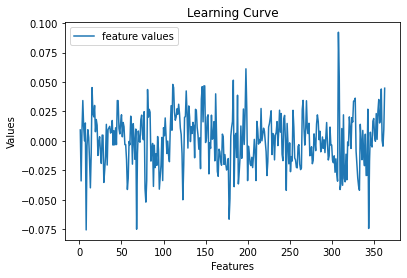

In [222]:
# part C 13 model training data with degree 3 & plot the optimal learning curve
X = data.drop(columns='quality')
# X = (X - X.mean())/X.std() ## standardized data
X = np.array(X)
X_poly3 = pd.DataFrame([])

for i in range(0, len(X)):
    X_poly3 = X_poly3.append(pd.DataFrame(polynomialFeatures(X[i], 3)).transpose())
    count = count + 1
print("Finished computing poly 3 for data")
Y = data['quality']
X = (X_poly3 - X_poly3.mean())/X_poly3.std()
print("Starting K Fold evaluation")
lambd = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.0001]
regularizer = ["l1", "l2"]
model = Linear_Regression()

dict = kFold(model, np.array(X), np.array(Y), 5, lambd, learning_rate, regularizer)
dict_df = pd.DataFrame(dict)
print(dict_df)


model.fit(X, Y, learning_rate=.01,lambd=1, regularizer='l2')
model.plot_curve()






